In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [9]:
# loading Argo EN4 data
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2014-04'))


# loading EnOI data
ds_hycomcci = xr.open_dataset('../Data/HYCOMcciAVG_vertEN4_2009_2013.nc')
hycomcci_monthly = xr.open_dataset('../Data/HYCOMcciAVG_vertEN4_2009_2014_monthly.nc')
hycomcci_monthly = hycomcci_monthly.sel(time=slice('2009-01','2014-04'))
hycomcci_monthly['time'].values = ds_EN4['time'].values


# loading HYCOMostia data
hycomostia_monthly = xr.open_dataset('../Data/HYCOMostiaAVG_vertEN4_2009_2014_monthly.nc')
hycomostia_monthly = hycomostia_monthly.sel(time=slice('2009-01','2014-04'))
hycomostia_monthly['time'].values = ds_EN4['time'].values


# loading HYCOMfree SST data
ds_hycomfree = xr.open_dataset('../Data/HYCOMfree_vertEN4_2009_2013.nc')
hycomfree_monthly = xr.open_dataset('../Data/HYCOMfreeAVG_vertEN4_2009_2014_monthly.nc')
hycomfree_monthly = hycomfree_monthly.sel(time=slice('2009-01','2014-04'))
hycomfree_monthly['time'].values = ds_EN4['time'].values

In [10]:
hycomostia_monthly.time

<xarray.DataArray 'time' (time: 64)>
array(['2009-01-16T12:00:00.000000000', '2009-02-15T00:00:00.000000000',
       '2009-03-16T12:00:00.000000000', '2009-04-16T00:00:00.000000000',
       '2009-05-16T12:00:00.000000000', '2009-06-16T00:00:00.000000000',
       '2009-07-16T12:00:00.000000000', '2009-08-16T12:00:00.000000000',
       '2009-09-16T00:00:00.000000000', '2009-10-16T12:00:00.000000000',
       '2009-11-16T00:00:00.000000000', '2009-12-16T12:00:00.000000000',
       '2010-01-16T12:00:00.000000000', '2010-02-15T00:00:00.000000000',
       '2010-03-16T12:00:00.000000000', '2010-04-16T00:00:00.000000000',
       '2010-05-16T12:00:00.000000000', '2010-06-16T00:00:00.000000000',
       '2010-07-16T12:00:00.000000000', '2010-08-16T12:00:00.000000000',
       '2010-09-16T00:00:00.000000000', '2010-10-16T12:00:00.000000000',
       '2010-11-16T00:00:00.000000000', '2010-12-16T12:00:00.000000000',
       '2011-01-16T12:00:00.000000000', '2011-02-15T00:00:00.000000000',
       '2011-0

In [11]:
ds_EN4.time

<xarray.DataArray 'time' (time: 64)>
array(['2009-01-16T12:00:00.000000000', '2009-02-15T00:00:00.000000000',
       '2009-03-16T12:00:00.000000000', '2009-04-16T00:00:00.000000000',
       '2009-05-16T12:00:00.000000000', '2009-06-16T00:00:00.000000000',
       '2009-07-16T12:00:00.000000000', '2009-08-16T12:00:00.000000000',
       '2009-09-16T00:00:00.000000000', '2009-10-16T12:00:00.000000000',
       '2009-11-16T00:00:00.000000000', '2009-12-16T12:00:00.000000000',
       '2010-01-16T12:00:00.000000000', '2010-02-15T00:00:00.000000000',
       '2010-03-16T12:00:00.000000000', '2010-04-16T00:00:00.000000000',
       '2010-05-16T12:00:00.000000000', '2010-06-16T00:00:00.000000000',
       '2010-07-16T12:00:00.000000000', '2010-08-16T12:00:00.000000000',
       '2010-09-16T00:00:00.000000000', '2010-10-16T12:00:00.000000000',
       '2010-11-16T00:00:00.000000000', '2010-12-16T12:00:00.000000000',
       '2011-01-16T12:00:00.000000000', '2011-02-15T00:00:00.000000000',
       '2011-0

# 1. Mean vertical differences

## 1.1 Temperature

### 1.1.1.c 2009--2013 annual mean differences

In [6]:
hycomcci_temp_ann = ds_hycomcci['temperature'].mean(dim=('longitude','latitude'), skipna=True)
hycomfree_temp_ann = ds_hycomfree['temperature'].mean(dim=('longitude','latitude'), skipna=True)
hycomostia_temp_ann = hycomostia_monthly['temperature'].resample(time='A').mean(dim=('time','longitude','latitude'), skipna=True)
en4_temp_ann = ds_EN4['temperature'].resample(time='A').mean(dim=('time','lon','lat'), skipna=True) - 273.15

In [7]:
hycomostia_temp_ann

<xarray.DataArray 'temperature' (time: 6, depth: 42)>
array([[16.584581, 16.475721, 16.28573 , ...,  1.253733,  1.229713,  1.135422],
       [16.644423, 16.536133, 16.334032, ...,  1.015055,  0.921772,  0.560873],
       [16.71989 , 16.612556, 16.418484, ...,  1.111533,  1.118179,  1.007917],
       [16.462551, 16.359234, 16.163279, ...,  1.241066,  1.227242,  1.163342],
       [16.426434, 16.326979, 16.132711, ...,  1.243348,  1.282715,  1.296023],
       [18.328047, 18.194683, 17.921703, ...,  1.118016,  1.15157 ,  1.119787]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2009-12-31 2010-12-31 ... 2014-12-31
  * depth    (depth) float32 5.02159 15.07854 25.16046 ... 5050.99 5350.272

In [13]:
en4_temp_ann

<xarray.DataArray 'temperature' (time: 6, depth: 42)>
array([[17.527802, 17.424591, 17.23825 , ...,  0.607361,  0.614685,  0.454071],
       [17.604889, 17.501251, 17.318878, ...,  0.615479,  0.625854,  0.449524],
       [17.737366, 17.642761, 17.46759 , ...,  0.611816,  0.6185  ,  0.446106],
       [17.479706, 17.37204 , 17.175903, ...,  0.613068,  0.619568,  0.444916],
       [17.463348, 17.377045, 17.20285 , ...,  0.612885,  0.618439,  0.444641],
       [19.599365, 19.4841  , 19.201416, ...,  0.615753,  0.61673 ,  0.445557]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2009-12-31 2010-12-31 ... 2014-12-31
  * depth    (depth) float32 5.0215898 15.07854 25.16046 ... 5050.9897 5350.272

#### HYCOM<sub>CCI</sub>

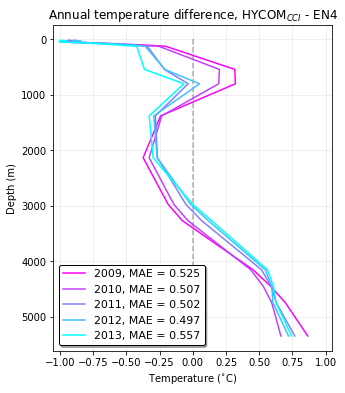

In [31]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomcci_temp_ann[year] - en4_temp_ann[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Annual temperature difference, HYCOM$_{CCI}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.05,1.05)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_meandiff_20092013_HYCOMcciEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>OSTIA</sub>

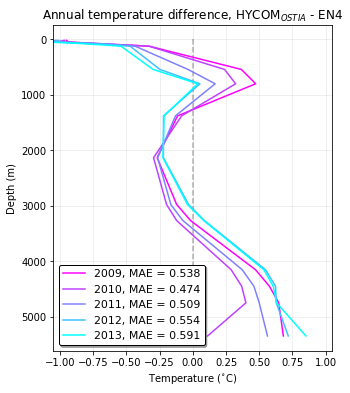

In [16]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomostia_temp_ann[year] - en4_temp_ann[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Annual temperature difference, HYCOM$_{OSTIA}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.05,1.05)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_meandiff_20092013_HYCOMostiaEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>FREE</sub>

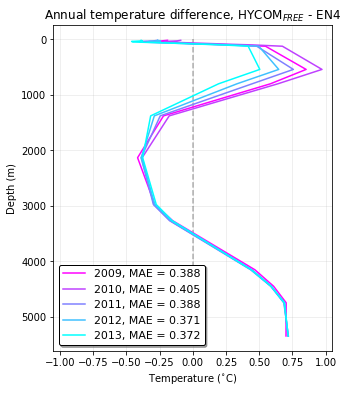

In [33]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomfree_temp_ann[year] - en4_temp_ann[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Annual temperature difference, HYCOM$_{FREE}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.05,1.05)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_meandiff_20092013_HYCOMfreeEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### 1.1.2 2010--2014 February

In [34]:
hycomcci_tempFeb = hycomcci_monthly['temperature'].sel(time=hycomcci_monthly.time.dt.month.isin([2])).mean(dim=('longitude','latitude'), skipna=True)
hycomfree_tempFeb = hycomfree_monthly['temperature'].sel(time=hycomfree_monthly.time.dt.month.isin([2])).mean(dim=('longitude','latitude'), skipna=True)
en4_tempFeb = ds_EN4['temperature'].sel(time=ds_EN4.time.dt.month.isin([2])).mean(dim=('lon','lat'), skipna=True) - 273.15

#### HYCOM<sub>CCI</sub>

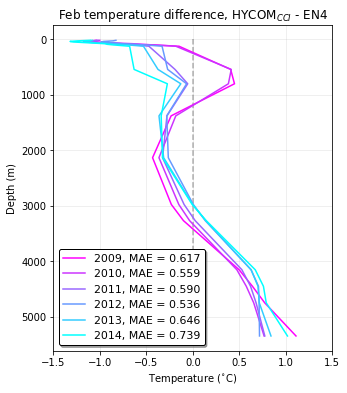

In [36]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 6)])

for year in np.arange(0,6):
    diff = hycomcci_tempFeb[year] - en4_tempFeb[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Feb temperature difference, HYCOM$_{CCI}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.5,1.5)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_Febdiff_20092014_HYCOMcciEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>FREE</sub>

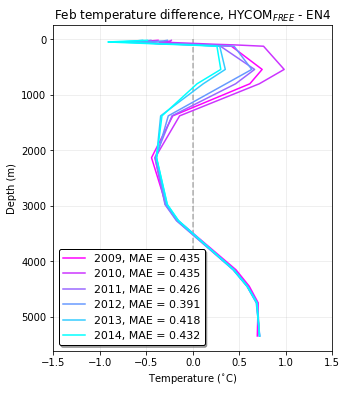

In [38]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 6)])

for year in np.arange(0,6):
    diff = hycomfree_tempFeb[year] - en4_tempFeb[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Feb temperature difference, HYCOM$_{FREE}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.5,1.5)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_Febdiff_20092014_HYCOMfreeEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### 1.1.3 2009--2013 July

In [39]:
hycomcci_tempJul = hycomcci_monthly['temperature'].sel(time=hycomcci_monthly.time.dt.month.isin([7])).mean(dim=('longitude','latitude'), skipna=True)
hycomfree_tempJul = hycomfree_monthly['temperature'].sel(time=hycomfree_monthly.time.dt.month.isin([7])).mean(dim=('longitude','latitude'), skipna=True)
en4_tempJul = ds_EN4['temperature'].sel(time=ds_EN4.time.dt.month.isin([7])).mean(dim=('lon','lat'), skipna=True) - 273.15

#### HYCOM<sub>CCI</sub>

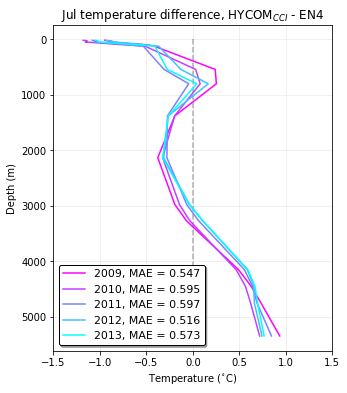

In [41]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomcci_tempJul[year] - en4_tempJul[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Jul temperature difference, HYCOM$_{CCI}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.5,1.5)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_Juldiff_20092013_HYCOMcciEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>FREE</sub>

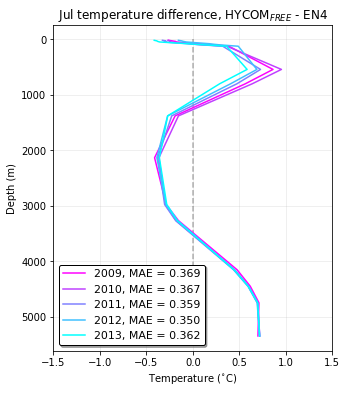

In [43]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomfree_tempJul[year] - en4_tempJul[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Jul temperature difference, HYCOM$_{FREE}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-1.5,1.5)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Temp_Juldiff_20092014_HYCOMfreeEN4_domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

## 1.2 Salinity

### 1.2.1.c 2009--2013 annual mean differences

In [17]:
hycomcci_sal_ann = ds_hycomcci['salinity'].mean(dim=('longitude','latitude'), skipna=True)
hycomfree_sal_ann = ds_hycomfree['salinity'].mean(dim=('longitude','latitude'), skipna=True)
hycomostia_sal_ann = hycomostia_monthly['salinity'].resample(time='A').mean(dim=('time','longitude','latitude'), skipna=True)
en4_sal_ann = ds_EN4['salinity'].resample(time='A').mean(dim=('time','lon','lat'), skipna=True)

#### HYCOM<sub>CCI</sub>

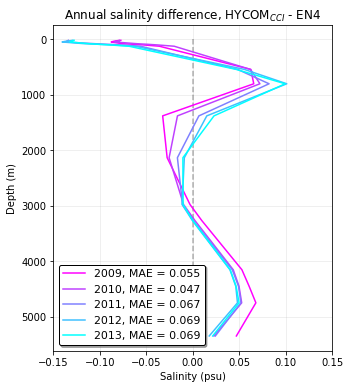

In [46]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomcci_sal_ann[year] - en4_sal_ann[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Annual salinity difference, HYCOM$_{CCI}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_meandiff_20092013_HYCOMcciEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>OSTIA</sub>

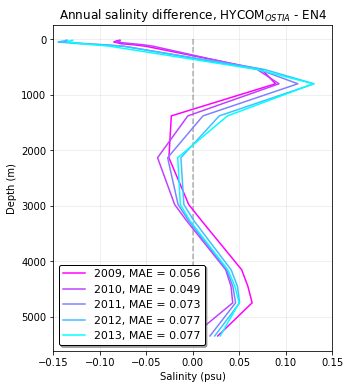

In [19]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomostia_sal_ann[year] - en4_sal_ann[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Annual salinity difference, HYCOM$_{OSTIA}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_meandiff_20092013_HYCOMostiaEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>FREE</sub>

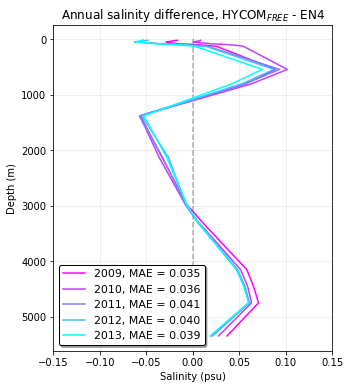

In [48]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomfree_sal_ann[year] - en4_sal_ann[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Annual salinity difference, HYCOM$_{FREE}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_meandiff_20092013_HYCOMfreeEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### 1.2.2 2009--2014 February

In [49]:
hycomcci_salFeb = hycomcci_monthly['salinity'].sel(time=hycomcci_monthly.time.dt.month.isin([2])).mean(dim=('longitude','latitude'), skipna=True)
hycomfree_salFeb = hycomfree_monthly['salinity'].sel(time=hycomfree_monthly.time.dt.month.isin([2])).mean(dim=('longitude','latitude'), skipna=True)
en4_salFeb = ds_EN4['salinity'].sel(time=ds_EN4.time.dt.month.isin([2])).mean(dim=('lon','lat'), skipna=True)

#### HYCOM<sub>CCI</sub>

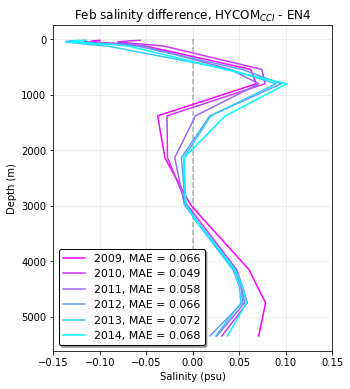

In [51]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 6)])

for year in np.arange(0,6):
    diff = hycomcci_salFeb[year] - en4_salFeb[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Feb salinity difference, HYCOM$_{CCI}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_Febdiff_20092014_HYCOMcciEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>FREE</sub>

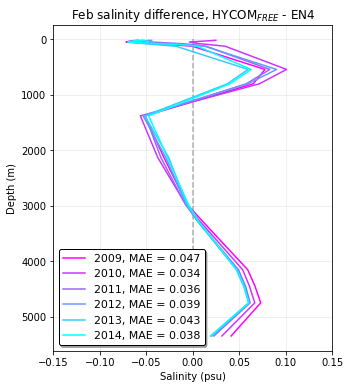

In [53]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 6)])

for year in np.arange(0,6):
    diff = hycomfree_salFeb[year] - en4_salFeb[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Feb salinity difference, HYCOM$_{FREE}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_Febdiff_20092014_HYCOMfreeEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

### 1.2.3 2009--2013 July

In [54]:
hycomcci_salJul = hycomcci_monthly['salinity'].sel(time=hycomcci_monthly.time.dt.month.isin([7])).mean(dim=('longitude','latitude'), skipna=True)
hycomfree_salJul = hycomfree_monthly['salinity'].sel(time=hycomfree_monthly.time.dt.month.isin([7])).mean(dim=('longitude','latitude'), skipna=True)
en4_salJul = ds_EN4['salinity'].sel(time=ds_EN4.time.dt.month.isin([7])).mean(dim=('lon','lat'), skipna=True)

#### HYCOM<sub>CCI</sub>

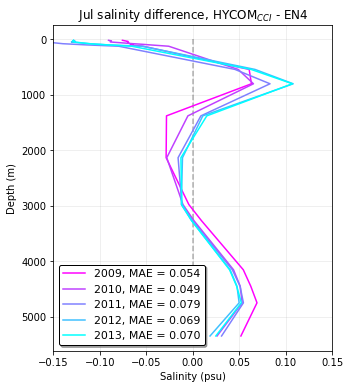

In [56]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomcci_salJul[year] - en4_salJul[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Jul salinity difference, HYCOM$_{CCI}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_Juldiff_20092013_HYCOMcciEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

#### HYCOM<sub>FREE</sub>

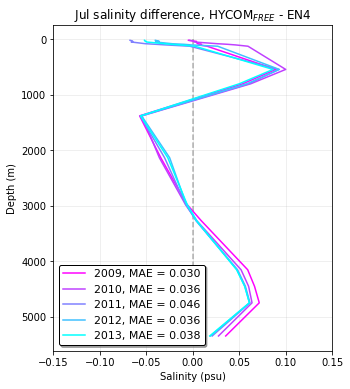

In [58]:
fig = plt.figure(figsize=(5,6))
plt.gca().invert_yaxis()
plt.vlines(0,ymin=0, ymax=5300, linestyle='dashed', alpha=0.3)
# set colormap for line colors to cycle through
plt.gca().set_prop_cycle('color',[plt.cm.cool_r(i) for i in np.linspace(0, 1, 5)])

for year in np.arange(0,5):
    diff = hycomfree_salJul[year] - en4_salJul[year]
    mae = np.abs(diff).mean()
    diff.plot.line(y='depth', linestyle='solid', label='{}, MAE = {:.3f}'.format(2009+year, mae.values))
plt.title('Jul salinity difference, HYCOM$_{FREE}$ - EN4')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (psu)')
plt.grid(axis='both', alpha=0.25)
plt.xlim(-0.15,0.15)
# plt.ylim(300,0)

plt.legend(edgecolor='k',loc='lower left', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.savefig('../Figures/profiles/Sal_Juldiff_20092013_HYCOMfreeEN4domain.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

# Hovmoller of differences 

## Temperature

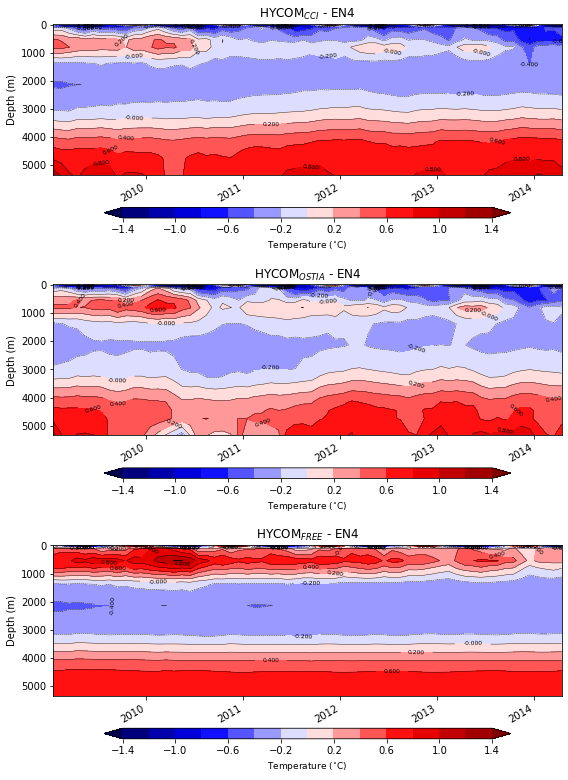

In [25]:
# define differences here
#
cci_en4 = hycomcci_monthly['temperature'].mean(dim=('longitude','latitude')) - (ds_EN4['temperature'].mean(dim=('lon','lat')) - 273.15)
ostia_en4 = hycomostia_monthly['temperature'].mean(dim=('longitude','latitude')) - (ds_EN4['temperature'].mean(dim=('lon','lat')) - 273.15)
free_en4 = hycomfree_monthly['temperature'].mean(dim=('longitude','latitude')) - (ds_EN4['temperature'].mean(dim=('lon','lat')) - 273.15)

fig = plt.figure(figsize=(8,11))
# fig.suptitle('Benguela Hovmoller')
hovs=[cci_en4, ostia_en4, free_en4]
names=['HYCOM$_{CCI}$ - EN4', 'HYCOM$_{OSTIA}$ - EN4', 'HYCOM$_{FREE}$ - EN4']
cbarticks=np.arange(-1.4,1.6,0.2)

for s, i in enumerate(hovs):
    
    ax = plt.subplot(3,1,s+1)
    
#     img = i.plot.contourf(x='time', levels=cbarticks, cmap='seismic', add_colorbar=False, extend='both')
    img = i.plot.contourf(x='time', levels=cbarticks, cmap='seismic', add_colorbar=False, extend='both')
    contours = i.plot.contour(x='time', levels=cbarticks, linewidths=0.4, colors='k')
    ax.clabel(contours, inline=True, fontsize=6, fmt='%1.3f')
    plt.ylim(-20,)
    ax.invert_yaxis()
    cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', aspect=35)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.set_title('{0}'.format(names[s]))
    plt.ylabel('Depth (m)')
    plt.xlabel('')
    
plt.savefig('../Figures/hovmoller/Temp_monthlydiff_HYCOM_EN4_domain.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## Salinity

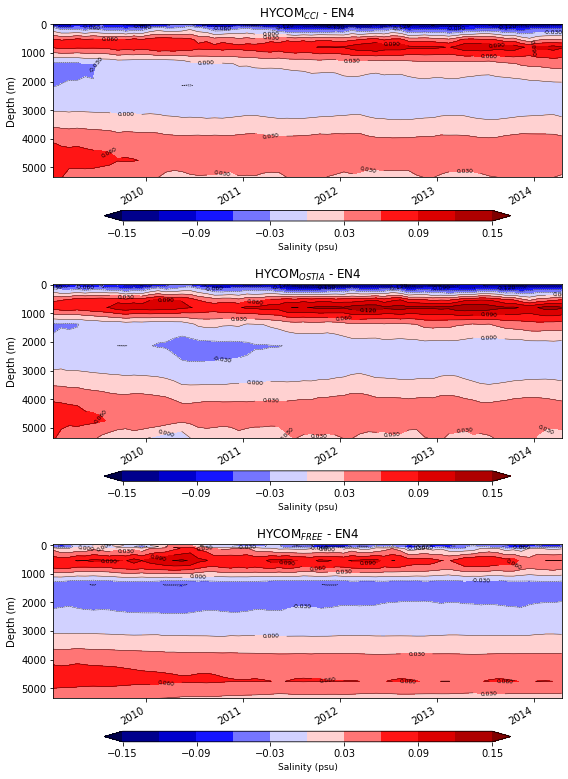

In [28]:
# define differences here
#
cci_en4 = hycomcci_monthly['salinity'].mean(dim=('longitude','latitude')) - ds_EN4['salinity'].mean(dim=('lon','lat'))
ostia_en4 = hycomostia_monthly['salinity'].mean(dim=('longitude','latitude')) - ds_EN4['salinity'].mean(dim=('lon','lat'))
free_en4 = hycomfree_monthly['salinity'].mean(dim=('longitude','latitude')) - ds_EN4['salinity'].mean(dim=('lon','lat'))

fig = plt.figure(figsize=(8,11))
# fig.suptitle('Benguela Hovmoller')
hovs=[cci_en4, ostia_en4, free_en4]
names=['HYCOM$_{CCI}$ - EN4', 'HYCOM$_{OSTIA}$ - EN4', 'HYCOM$_{FREE}$ - EN4']
cbarticks=np.arange(-0.15,0.18,0.03)

for s, i in enumerate(hovs):
    
    ax = plt.subplot(3,1,s+1)
    
#     img = i.plot.contourf(x='time', levels=cbarticks, cmap='seismic', add_colorbar=False, extend='both')
    img = i.plot.contourf(x='time', levels=cbarticks, cmap='seismic', add_colorbar=False, extend='both')
    contours = i.plot.contour(x='time', levels=cbarticks, linewidths=0.4, colors='k')
    ax.clabel(contours, inline=True, fontsize=6, fmt='%1.3f')
    plt.ylim(-20,)
    ax.invert_yaxis()
    cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', aspect=35)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.set_title('{0}'.format(names[s]))
    plt.ylabel('Depth (m)')
    plt.xlabel('')
    
plt.savefig('../Figures/hovmoller/Sal_monthlydiff_HYCOM_EN4_domain.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()